In [1]:
##Created By Unfriendly 
#(A simple Jupyter Notebook in Binder for Crypto price prediction)

historical_start = "6yr,0mon,0day,0hr,0min,0sec"
# How long to historically look back at data

predict_into = "0yr,0mon,10day,0hr,0min,0sec" 
# How far to try and predict into the future

In [2]:
import os, glob
for dirname, _, filenames in os.walk('/unfriendly/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import json
import requests
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, LSTM
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_error
%matplotlib inline

In [4]:
import matplotlib.pyplot as plt

In [5]:
# Prepare data timestamps
import time
from datetime import datetime, timezone, timedelta
one_yr = 31536000000
one_mon = one_yr/12
one_day = one_yr/365
one_hr = one_day/24
one_min = one_hr/60
one_sec = one_min/60

In [6]:
# Prepare how far to look back in the past in UNIX time-format
history_split = historical_start.replace('yr', '')
history_res = history_split.replace('mon', '')
history_split = history_res.replace('day', '')
history_res = history_split.replace('hr', '')
history_split = history_res.replace('min', '')
history_res = history_split.replace('sec', '')
history_split = history_res.split(",")
print(history_split)

['6', '0', '0', '0', '0', '0']


In [7]:
# Prepare how far to predict into the future in UNIX time-format
predict_split = predict_into.replace('yr', '')
predict_res = predict_split.replace('mon', '')
predict_split = predict_res.replace('day', '')
predict_res = predict_split.replace('hr', '')
predict_split = predict_res.replace('min', '')
predict_res = predict_split.replace('sec', '')
predict_split = predict_res.split(",")
print(predict_split)

['0', '0', '10', '0', '0', '0']


In [8]:
history_array_yr = int(history_split[0])
unix_hist_yr = one_yr*history_array_yr

history_array_mon = int(history_split[1])
unix_hist_mon = one_mon*history_array_mon

history_array_day = int(history_split[2])
unix_hist_day = one_day*history_array_day

history_array_hr = int(history_split[3])
unix_hist_hr = one_hr*history_array_hr

history_array_min = int(history_split[4])
unix_hist_min = one_min*history_array_min

history_array_sec = int(history_split[5])
unix_hist_sec = one_sec*history_array_sec

In [9]:
predict_array_yr = int(predict_split[0])
unix_pred_yr = one_yr*predict_array_yr

predict_array_mon = int(predict_split[1])
unix_pred_mon = one_mon*predict_array_mon

predict_array_day = int(predict_split[2])
unix_pred_day = one_day*predict_array_day

predict_array_hr = int(predict_split[3])
unix_pred_hr = one_hr*predict_array_hr

predict_array_min = int(predict_split[4])
unix_pred_min = one_min*predict_array_min

predict_array_sec = int(predict_split[5])
unix_pred_sec = one_sec*predict_array_sec

unix_prediction = unix_pred_yr+unix_pred_mon+unix_pred_day+unix_pred_hr+unix_pred_min+unix_pred_sec

In [10]:
raw_time = time.time()
int_time = int(raw_time)
current_time = str(int_time)

unix_start = unix_hist_yr+unix_hist_mon+unix_hist_day+unix_hist_hr+unix_hist_min+unix_hist_sec
raw_start = raw_time - unix_start

int_start = int(raw_start)
start = str(int_start)

#print(unix_hist_yr+history_array_mon+history_array_day+history_array_hr+history_array_min+history_array_sec)
print(start + ' - start')

gather_count = int_start/(7*one_day)
gather_int = int(gather_count)
gather_str = str(gather_int)
pos_gather_count = abs(int(gather_count))
pos_gather_str = str(pos_gather_count)

print(gather_str + ' - gather')
print(pos_gather_str + ' - positive gather')

-187602546332 - start
-310 - gather
310 - positive gather


In [11]:
print((datetime.now(timezone.utc) + timedelta(hours=0)).timestamp() * 1e3)

dt = (datetime.now(timezone.utc) + timedelta(days=0)).timestamp() * 1e3

c_dt = int(dt)

c_dt_int = int(c_dt)
print(str(c_dt_int))

c_dt_array_year = history_array_yr*365

history_array_comb = history_array_day + c_dt_array_year

c_dt_start = (datetime.now(timezone.utc) + timedelta(days=-history_array_comb,hours=-history_array_hr,minutes=-history_array_min,seconds=-history_array_sec)).timestamp() * 1e3

c_dt_start_int = int(c_dt_start)
print(str(c_dt_start_int))

c_dt_start_raw = (datetime.now(timezone.utc) + timedelta(days=-history_array_comb,hours=-history_array_hr,minutes=-history_array_min,seconds=-history_array_sec)).timestamp()
c_dt_start_raw_int = int(c_dt_start_raw)
print(str(c_dt_start_raw))       
    
data_count = 0

c_dt_start_dt = datetime.utcfromtimestamp(c_dt_start_raw).strftime('%Y-%m-%d %H:%M:%S.%f+00:00')

print(datetime.now(timezone.utc))
print(datetime.utcfromtimestamp(c_dt_start_raw).strftime('%Y-%m-%d %H:%M:%S.%f+00:00'))

#c_dt_end = c_dt_start + timedelta(days=7).timestamp() * 1e3
#c_dt_end = (c_dt_start_dt + timedelta(days=7)).timestamp() * 1e3

c_dt_end = (datetime.utcfromtimestamp(c_dt_start_raw) + timedelta(days=7)).timestamp() * 1e3

c_dt_start_int = int(c_dt_start)
c_dt_end_int = int(c_dt_end)
c_dt_end_str = str(c_dt_end)


c_dt_str = str(c_dt)
c_dt_start_str = str(c_dt_start_int)


ts_ten_int = int(c_dt/1000)
start_ten_int = int(c_dt_start_int/1000)

ts_ten_str = str(ts_ten_int)
start_ten_str = str(start_ten_int)


print(c_dt_start_int)
print(c_dt_end_int)
print(c_dt_int)
print('13 Digit Microsecond TS: ' + c_dt_start_str + ' - ' + '10 Digit TS: ' + start_ten_str)

1613453667213.612
1613453667214
1424237667214
1424237667.215112
2021-02-16 05:34:27.215611+00:00
2015-02-18 05:34:27.215112+00:00
1424237667214
1424860467215
1613453667214
13 Digit Microsecond TS: 1424237667214 - 10 Digit TS: 1424237667


In [12]:
import urllib.request
import yfinance as yf

#while count < pos_gather_count:
while data_count < 1:
    
    #d_u="https://query1.finance.yahoo.com/v7/finance/download/BTC-USD?period1=1411862400&period2=" + current_time + "&interval=1d&events=history&includeAdjustedClose=true"
    #d_u="https://query1.finance.yahoo.com/v7/finance/download/BTC-USD?period1=1411862400&period2=1612158064&interval=1d&events=history&includeAdjustedClose=true"
    #d_u="https://query1.finance.yahoo.com/v7/finance/download/BTC-USD?period1="+dt_str+"&period2="+dt_end_str+"&interval=1d&events=history&includeAdjustedClose=true"
    #d_u="https://query1.finance.yahoo.com/v7/finance/download/BTC-USD?period1="+gather_str+"&period2="+current_time+"&interval=1m&events=history&includeAdjustedClose=true"
    
    
    d_u="https://query1.finance.yahoo.com/v7/finance/download/BTC-USD?period1="+start_ten_str+"&period2="+ts_ten_str+"&interval=1d&events=history&includeAdjustedClose=true"
    
    print(d_u)
    
    with urllib.request.urlopen(d_u) as testfile, open('dataset.csv', 'w') as f:
        f.write(testfile.read().decode())

    data_count += 1  # This is the same as count = count + 1

https://query1.finance.yahoo.com/v7/finance/download/BTC-USD?period1=1424237667&period2=1613453667&interval=1d&events=history&includeAdjustedClose=true


In [13]:
#data=pd.read_csv('dataset.csv')
data = yf.download(tickers='BTC-USD', period='max', interval='1d', group_by='column', auto_adjust = True, prepost = True, threads = True, proxy = None)


data.apply(pd.to_numeric, errors='coerce')

#data=data.dropna()
#data=data.dropna(inplace=True)
#data=data.dropna(subset=['Close'])
#data=data.dropna(how='any',axis=1)

data.dropna(subset=['Close'], inplace=True)
data.reset_index(drop=True)

data

[*********************100%***********************]  1 of 1 completed


Open          High           Low         Close  \
Date                                                                 
2014-09-17    465.864014    468.174011    452.421997    457.334015   
2014-09-18    456.859985    456.859985    413.104004    424.440002   
2014-09-19    424.102997    427.834991    384.532013    394.795990   
2014-09-20    394.673004    423.295990    389.882996    408.903992   
2014-09-21    408.084991    412.425995    393.181000    398.821014   
...                  ...           ...           ...           ...   
2021-02-12  47877.035156  48745.734375  46424.976562  47504.851562   
2021-02-13  47491.203125  48047.746094  46392.281250  47105.515625   
2021-02-14  47114.507812  49487.640625  47114.507812  48717.289062   
2021-02-15  48696.535156  48875.570312  46347.476562  47945.058594   
2021-02-16  48209.222656  49708.578125  47237.464844  49193.343750   

                 Volume  
Date                     
2014-09-17     21056800  
2014-09-18     34483200  
2014-09-19     37919700  
2014-09-20     36863600  
2014-09-21     26580100  
...                 ...  
2021-02-12  76555041196  
2021-02-13  70250456155  
2021-02-14  71248675228  
2021-02-15  77069903166  
2021-02-16  71766949888  

[2341 rows x 5 columns]

In [14]:
df1=data['Close']
df1

Date
2014-09-17      457.334015
2014-09-18      424.440002
2014-09-19      394.795990
2014-09-20      408.903992
2014-09-21      398.821014
                  ...     
2021-02-12    47504.851562
2021-02-13    47105.515625
2021-02-14    48717.289062
2021-02-15    47945.058594
2021-02-16    49193.343750
Name: Close, Length: 2341, dtype: float64

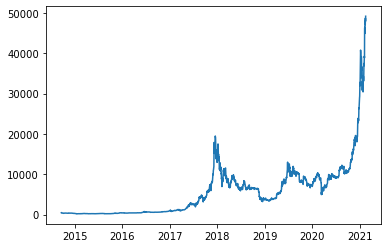

In [15]:
plt.plot(df1)

In [16]:
import numpy as np

In [17]:
df1

Date
2014-09-17      457.334015
2014-09-18      424.440002
2014-09-19      394.795990
2014-09-20      408.903992
2014-09-21      398.821014
                  ...     
2021-02-12    47504.851562
2021-02-13    47105.515625
2021-02-14    48717.289062
2021-02-15    47945.058594
2021-02-16    49193.343750
Name: Close, Length: 2341, dtype: float64

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [19]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [20]:
training_size,test_size

(1521, 820)

In [21]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [22]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [23]:
print(X_train.shape), print(y_train.shape)

(1420, 100)
(1420,)


(None, None)

In [24]:
print(X_test.shape), print(ytest.shape)

(719, 100)
(719,)


(None, None)

In [25]:
X_train.shape[1]

100

In [26]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [27]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from keras.optimizers import Adam, Adadelta, SGD

In [28]:
opt = Adam(lr=0.0001)
#opt = Adam(lr=0.0025)
#opt = Adadelta(lr=1, rho=0.95, epsilon=1e-6, decay=0, clipnorm=NULL, clipvalue=NULL)
#opt = Adadelta(lr=1, rho=0.95, epsilon=1e-6, decay=0)

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

#model.compile(loss='mean_squared_error',optimizer='adam')
model.compile(optimizer=opt, loss='mean_squared_error')

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=128,verbose=1)

Epoch 1/100
12/12 [==============================] - 7s 186ms/step - loss: 0.0113 - val_loss: 0.0653
Epoch 2/100
12/12 [==============================] - 0s 30ms/step - loss: 0.0060 - val_loss: 0.0398
Epoch 3/100
12/12 [==============================] - 0s 30ms/step - loss: 0.0038 - val_loss: 0.0225
Epoch 4/100
12/12 [==============================] - 0s 30ms/step - loss: 0.0027 - val_loss: 0.0137
Epoch 5/100
12/12 [==============================] - 0s 33ms/step - loss: 0.0018 - val_loss: 0.0071
Epoch 6/100
12/12 [==============================] - 0s 31ms/step - loss: 7.1672e-04 - val_loss: 0.0027
Epoch 7/100
12/12 [==============================] - 0s 31ms/step - loss: 6.0416e-04 - val_loss: 0.0022
Epoch 8/100
12/12 [==============================] - 0s 30ms/step - loss: 5.2028e-04 - val_loss: 0.0033
Epoch 9/100
12/12 [==============================] - 0s 30ms/step - loss: 4.9621e-04 - val_loss: 0.0027
Epoch 10/100
12/12 [==============================] - 0s 29ms/step - loss: 5.6404e-

Epoch 79/100
12/12 [==============================] - 0s 29ms/step - loss: 1.9063e-04 - val_loss: 0.0046
Epoch 80/100
12/12 [==============================] - 0s 28ms/step - loss: 1.9102e-04 - val_loss: 0.0045
Epoch 81/100
12/12 [==============================] - 0s 30ms/step - loss: 1.8511e-04 - val_loss: 0.0044
Epoch 82/100
12/12 [==============================] - 0s 30ms/step - loss: 2.0086e-04 - val_loss: 0.0049
Epoch 83/100
12/12 [==============================] - 0s 29ms/step - loss: 1.5879e-04 - val_loss: 0.0045
Epoch 84/100
12/12 [==============================] - 0s 28ms/step - loss: 1.6653e-04 - val_loss: 0.0047
Epoch 85/100
12/12 [==============================] - 0s 29ms/step - loss: 1.7552e-04 - val_loss: 0.0048
Epoch 86/100
12/12 [==============================] - 0s 31ms/step - loss: 1.5621e-04 - val_loss: 0.0046
Epoch 87/100
12/12 [==============================] - 0s 31ms/step - loss: 2.1799e-04 - val_loss: 0.0047
Epoch 88/100
12/12 [==============================] - 0

In [31]:
import tensorflow as tf
### Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
### Calculate RMSE performance metrics

In [32]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

4942.877181235912

In [33]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

11809.436337894715

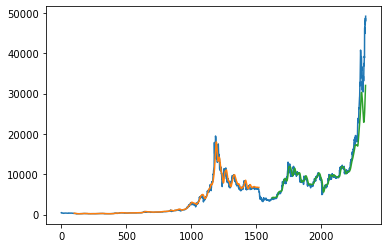

In [34]:
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [35]:
len(test_data)
tdl_int = len(test_data)
tdl_length = tdl_int - 100
print(tdl_int)
print(tdl_length)

820
720


In [36]:
x_input=test_data[tdl_length:].reshape(1,-1)
x_input.shape

(1, 100)

In [37]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

temp_input

[0.3091734774735359,
 0.30832857524922486,
 0.3167022462481462,
 0.3284333710455444,
 0.32927932922330394,
 0.324185609024473,
 0.3218893685180401,
 0.3374054289476883,
 0.35636473441258754,
 0.3596004547097429,
 0.35986739177205146,
 0.37627503553789227,
 0.3767018001202665,
 0.37114780375981055,
 0.3710278235396865,
 0.3861933871190486,
 0.3785356924054774,
 0.3462702577656895,
 0.3454088786828525,
 0.35783382466683333,
 0.3672200952518699,
 0.396769099607341,
 0.37998171107305706,
 0.38810354713634765,
 0.393087846649539,
 0.37787558203464533,
 0.3871474908688496,
 0.3910420065759389,
 0.3879105268154307,
 0.37015102355177215,
 0.37489998491150855,
 0.369005413678452,
 0.36480084613051733,
 0.37999513961313736,
 0.38690577714740404,
 0.3890329057128849,
 0.3925100209530863,
 0.43114130084233976,
 0.46163313216172835,
 0.46842283314067235,
 0.4833543336801777,
 0.4753458631852209,
 0.4615906947872906,
 0.4815834001288745,
 0.4705320702684795,
 0.480622880963783,
 0.4995729418550957,


In [38]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0

#Ten Days
#while(i<10):

while(i<10):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.6791407]
101
1 day input [0.30832858 0.31670225 0.32843337 0.32927933 0.32418561 0.32188937
 0.33740543 0.35636473 0.35960045 0.35986739 0.37627504 0.3767018
 0.3711478  0.37102782 0.38619339 0.37853569 0.34627026 0.34540888
 0.35783382 0.3672201  0.3967691  0.37998171 0.38810355 0.39308785
 0.37787558 0.38714749 0.39104201 0.38791053 0.37015102 0.37489998
 0.36900541 0.36480085 0.37999514 0.38690578 0.38903291 0.39251002
 0.4311413  0.46163313 0.46842283 0.48335433 0.47534586 0.46159069
 0.4815834  0.47053207 0.48062288 0.49957294 0.53572998 0.53236894
 0.5489457  0.55460983 0.58477424 0.58805419 0.59565247 0.65182103
 0.66517924 0.64865153 0.68987372 0.74765032 0.79960721 0.82871176
 0.8176323  0.7789075  0.72199081 0.68845644 0.75768793 0.79585909
 0.7476708  0.7344662  0.72657349 0.74368647 0.73225595 0.72160509
 0.62526667 0.6697439  0.65060457 0.65512839 0.65669961 0.66085051
 0.61724564 0.64207585 0.69648304 0.69552694 0.67195949 0.68058572
 0.72084081 0.76086512 0.74972525 0

9 day input [0.35960045 0.35986739 0.37627504 0.3767018  0.3711478  0.37102782
 0.38619339 0.37853569 0.34627026 0.34540888 0.35783382 0.3672201
 0.3967691  0.37998171 0.38810355 0.39308785 0.37787558 0.38714749
 0.39104201 0.38791053 0.37015102 0.37489998 0.36900541 0.36480085
 0.37999514 0.38690578 0.38903291 0.39251002 0.4311413  0.46163313
 0.46842283 0.48335433 0.47534586 0.46159069 0.4815834  0.47053207
 0.48062288 0.49957294 0.53572998 0.53236894 0.5489457  0.55460983
 0.58477424 0.58805419 0.59565247 0.65182103 0.66517924 0.64865153
 0.68987372 0.74765032 0.79960721 0.82871176 0.8176323  0.7789075
 0.72199081 0.68845644 0.75768793 0.79585909 0.7476708  0.7344662
 0.72657349 0.74368647 0.73225595 0.72160509 0.62526667 0.6697439
 0.65060457 0.65512839 0.65669961 0.66085051 0.61724564 0.64207585
 0.69648304 0.69552694 0.67195949 0.68058572 0.72084081 0.76086512
 0.74972525 0.7745796  0.79746438 0.79006729 0.93885822 0.94466541
 0.91277896 0.97380383 0.96555169 0.95740451 0.9902876

In [39]:
day_new=np.arange(1,101)

#Ten Days
#day_pred=np.arange(101,111)

day_pred=np.arange(101,111)

In [40]:
import matplotlib.pyplot as plt

In [41]:
len(df1)
df2_int = len(df1)
df2_length = df2_int - 100
print(df2_int)
print(df2_length)

2341
2241


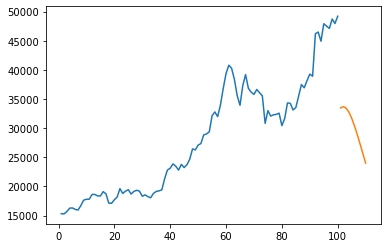

In [42]:
#plt.plot(day_new,scaler.inverse_transform(df1[2205:]))

plt.plot(day_new,scaler.inverse_transform(df1[df2_length:]))

plt.plot(day_pred,scaler.inverse_transform(lst_output))

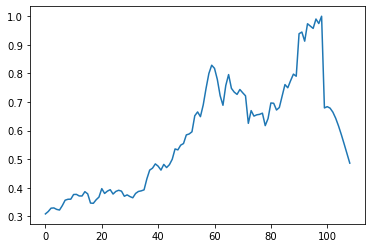

In [43]:
df3=df1.tolist()
df3.extend(lst_output)
#plt.plot(df3[2206:])

df3_length = df2_length + 1

plt.plot(df3[df3_length:])

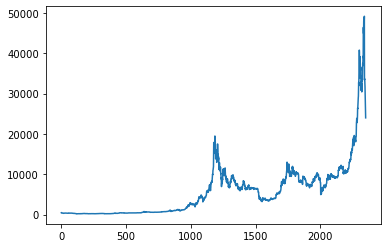

In [44]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)